In [1]:
# Import Dependences 
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from collections import defaultdict
seed = 1
np.random.seed(seed)

In [2]:
# Import Pokemon CSV data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

In [3]:
# Import Pokemon Combats CSV data
combats = pd.read_csv("combats.csv")
combats.head(5)

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [4]:
# Rename column with symbol 
pokemon = pokemon.rename(index=str, columns={"#": "Pokemon Number"})
pokemon.columns

Index(['Pokemon Number', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
# pokemon = pokemon.set_index("Pokemon Number")
# pokemon

In [6]:
# Display Combats Table with Names
combats.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [7]:
# What are the Dimenstions of the Pokemon and Combat Data Series
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combats.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


In [8]:
# Identify Any Null fields for Pokemon Data
pokemon.isnull().sum()

Pokemon Number      0
Name                1
Type 1              0
Type 2            386
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Generation          0
Legendary           0
dtype: int64

In [9]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 12 columns):
Pokemon Number    800 non-null int64
Name              799 non-null object
Type 1            800 non-null object
Type 2            414 non-null object
HP                800 non-null int64
Attack            800 non-null int64
Defense           800 non-null int64
Sp. Atk           800 non-null int64
Sp. Def           800 non-null int64
Speed             800 non-null int64
Generation        800 non-null int64
Legendary         800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [10]:
# Identify Any Null fields for Combat Data
combats.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [11]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


In [12]:
# What is the missing Pokemon's line? 
print(pokemon[pokemon["Name"].isnull ()])

    Pokemon Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  \
62              63  NaN  Fighting    NaN  65     105       60       60   

    Sp. Def  Speed  Generation  Legendary  
62       70     95           1      False  


In [13]:
#Check the name of the pokemon number before and after
print("The pokemon before the missing pokemon is " + pokemon['Name'][61])
print('------------------')
print("The pokemon after the missing pokemon is " + pokemon['Name'][63])

The pokemon before the missing pokemon is Mankey
------------------
The pokemon after the missing pokemon is Growlithe


In [14]:
#Update the name of the missing Pokemon
pokemon['Name'][63] = "Primeape"

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Confirm count of null fields in the pokemon data set
pokemon.isnull().sum()

Pokemon Number      0
Name                1
Type 1              0
Type 2            386
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Generation          0
Legendary           0
dtype: int64

In [16]:
# What is the name of the missing Pokemon
print(" The missing pokemon was "+ pokemon["Name"][63]+ ", The next evolution of Mankey")

 The missing pokemon was Primeape, The next evolution of Mankey


In [17]:
# How many unique Type 1 Pokemon are there in the dataset
print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))
list(pokemon["Type 1"].drop_duplicates())

There are 18 Types.


['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [18]:
# How many Type 1 pokemon are in the dataset
print(pokemon['Type 1'].value_counts(dropna =False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [19]:
#poke_count = pokemon['Type 1'].value_counts(dropna =False))

Text(0.5, 1.0, 'Total Pokemon by Type 1')

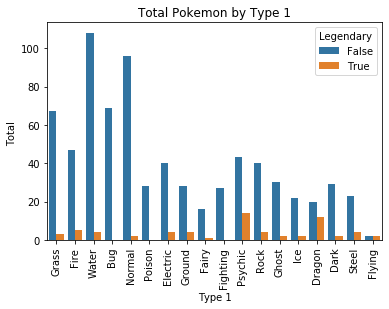

In [20]:
ax = sns.countplot(x="Type 1", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

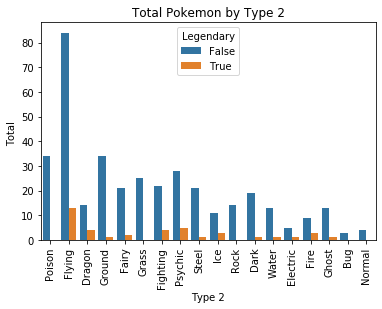

In [21]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [22]:
# How many unique Type 1 and Type 2 combinations in the dataset
type_cols = ["Type 1", "Type 2"]
print ("There are {} unique type-combinations.".format(len(pokemon[type_cols].drop_duplicates())))

There are 154 unique type-combinations.


In [23]:
corr_data = pokemon.drop(columns=['Pokemon Number'])
corr_data
#pokemon.describe()

Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0         Bulbasaur    Grass  Poison  45      49       49       65       65   
1           Ivysaur    Grass  Poison  60      62       63       80       80   
2          Venusaur    Grass  Poison  80      82       83      100      100   
3     Mega Venusaur    Grass  Poison  80     100      123      122      120   
4        Charmander     Fire     NaN  39      52       43       60       50   
..              ...      ...     ...  ..     ...      ...      ...      ...   
795         Diancie     Rock   Fairy  50     100      150      100      150   
796    Mega Diancie     Rock   Fairy  50     160      110      160      110   
797  Hoopa Confined  Psychic   Ghost  80     110       60      150      130   
798   Hoopa Unbound  Psychic    Dark  80     160       60      170      130   
799       Volcanion     Fire   Water  80     110      120      130       90   

     Speed  Generation  Legendary  
0       45           1      False  
1       60           1      False  
2       80           1      False  
3       80           1      False  
4       65           1      False  
..     ...         ...        ...  
795     50           6       True  
796    110           6       True  
797     70           6       True  
798     80           6       True  
799     70           6       True  

[800 rows x 11 columns]

In [24]:
corr_data.corr()

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
HP          1.000000  0.422386  0.239622  0.362380  0.378718  0.175952   
Attack      0.422386  1.000000  0.438687  0.396362  0.263990  0.381240   
Defense     0.239622  0.438687  1.000000  0.223549  0.510747  0.015227   
Sp. Atk     0.362380  0.396362  0.223549  1.000000  0.506121  0.473018   
Sp. Def     0.378718  0.263990  0.510747  0.506121  1.000000  0.259133   
Speed       0.175952  0.381240  0.015227  0.473018  0.259133  1.000000   
Generation  0.058683  0.051451  0.042419  0.036437  0.028486 -0.023121   
Legendary   0.273620  0.345408  0.246377  0.448907  0.363937  0.326715   

            Generation  Legendary  
HP            0.058683   0.273620  
Attack        0.051451   0.345408  
Defense       0.042419   0.246377  
Sp. Atk       0.036437   0.448907  
Sp. Def       0.028486   0.363937  
Speed        -0.023121   0.326715  
Generation    1.000000   0.079794  
Legendary     0.079794   1.000000

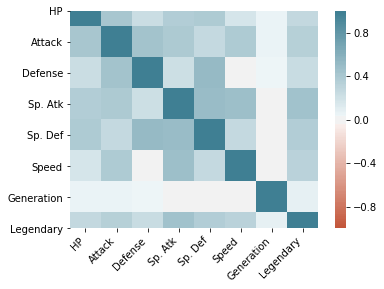

In [25]:
#correlation map
corr = corr_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

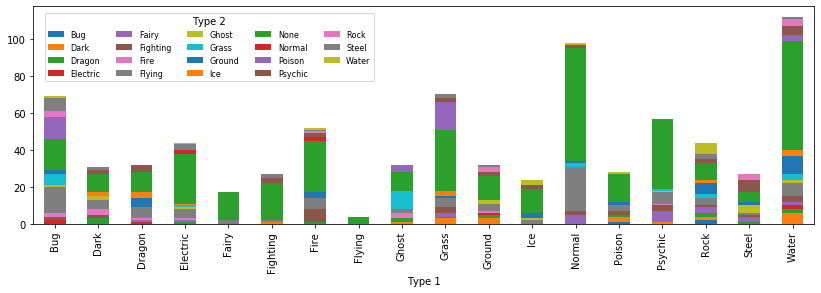

In [26]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()

In [27]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combats.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combats.groupby('Winner').count()
print(total_Wins)


163    152
154    136
438    136
428    134
432    133
      ... 
189      5
237      4
639      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64


In [28]:
#both methods produce the same results
countByFirst = combats.groupby('Second_pokemon').count()
countBySecond = combats.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [29]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Pokemon Number        231
Name              Shuckle
Type 1                Bug
Type 2               Rock
HP                     20
Attack                 10
Defense               230
Sp. Atk                10
Sp. Def               230
Speed                   5
Generation              2
Legendary           False
Name: 230, dtype: object


In [30]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on="Pokemon Number")
results3 = pd.merge(pokemon, numberOfWins, left_on="Pokemon Number", right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
Model_Win_Percent =results3[results3['Win Percentage'].isnull()]
Win_Percent = results3
Win_Percent

Pokemon Number            Name   Type 1  Type 2  HP  Attack  Defense  \
0                 1       Bulbasaur    Grass  Poison  45      49       49   
1                 2         Ivysaur    Grass  Poison  60      62       63   
2                 3        Venusaur    Grass  Poison  80      82       83   
3                 4   Mega Venusaur    Grass  Poison  80     100      123   
4                 5      Charmander     Fire    None  39      52       43   
..              ...             ...      ...     ...  ..     ...      ...   
795             796         Diancie     Rock   Fairy  50     100      150   
796             797    Mega Diancie     Rock   Fairy  50     160      110   
797             798  Hoopa Confined  Psychic   Ghost  80     110       60   
798             799   Hoopa Unbound  Psychic    Dark  80     160       60   
799             800       Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  First_pokemon  \
0         65       65     45           1      False           37.0   
1         80       80     60           1      False           46.0   
2        100      100     80           1      False           89.0   
3        122      120     80           1      False           70.0   
4         60       50     65           1      False           55.0   
..       ...      ...    ...         ...        ...            ...   
795      100      150     50           6       True           39.0   
796      160      110    110           6       True          116.0   
797      150      130     70           6       True           60.0   
798      170      130     80           6       True           89.0   
799      130       90     70           6       True           75.0   

     Second_pokemon  Total Fights  Win Percentage  
0              37.0         133.0        0.278195  
1              46.0         121.0        0.380165  
2              89.0         132.0        0.674242  
3              70.0         125.0        0.560000  
4              55.0         112.0        0.491071  
..              ...           ...             ...  
795            39.0         105.0        0.371429  
796           116.0         131.0        0.885496  
797            60.0         119.0        0.504202  
798            89.0         144.0        0.618056  
799            75.0         121.0        0.619835  

[800 rows x 16 columns]

In [31]:
print(Win_Percent.dtypes)

Pokemon Number      int64
Name               object
Type 1             object
Type 2             object
HP                  int64
Attack              int64
Defense             int64
Sp. Atk             int64
Sp. Def             int64
Speed               int64
Generation          int64
Legendary            bool
First_pokemon     float64
Second_pokemon    float64
Total Fights      float64
Win Percentage    float64
dtype: object


In [32]:
#Win_Percent = Win_Percent.First_pokemon.astype(int)
#print(Win_Percent.dtypes)

In [33]:
Win_Percent_Type = results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage", ascending=False)
Win_Percent_Type.head(5)

Win Percentage
Type 1                  
Flying          0.765061
Dragon          0.633587
Electric        0.632861
Dark            0.629726
Fire            0.579215

In [34]:
Win_Percent_Type.tail(5)

Win Percentage
Type 1                
Bug           0.439006
Poison        0.433262
Steel         0.424529
Rock          0.404852
Fairy         0.329300

In [35]:
Total_Fights = results3.groupby('Type 1').agg({"Total Fights": "mean"}).sort_values(by = "Total Fights", ascending=False)
Total_Fights.head(5)

Total Fights
Type 1              
Steel     131.333333
Poison    130.500000
Rock      128.840909
Water     128.816514
Bug       128.731343

In [36]:
Total_Fights.tail(5)

Total Fights
Type 1                
Fire        126.000000
Grass       125.761194
Ground      125.451613
Electric    124.325581
Flying      119.500000

In [37]:
Win_Percent.columns

Index(['Pokemon Number', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'First_pokemon', 'Second_pokemon', 'Total Fights', 'Win Percentage'],
      dtype='object')

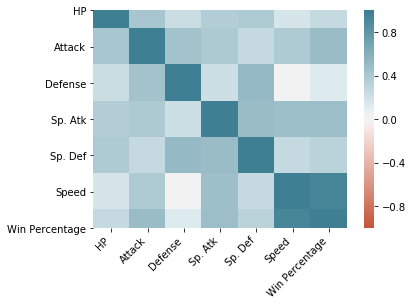

In [38]:
Win_Corr = Win_Percent.drop(columns=['Pokemon Number','Generation','Legendary','First_pokemon','Second_pokemon','Total Fights'])
Win_Corr.corr()

#correlation map
corr = Win_Corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [39]:
names_dict = dict(zip(pokemon['Pokemon Number'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats = combats_name
combats

First_pokemon Second_pokemon            Winner
0              Larvitar        Nuzleaf           Nuzleaf
1              Virizion      Terrakion         Terrakion
2               Togetic       Beheeyem          Beheeyem
3                Slugma      Druddigon         Druddigon
4               Omastar        Shuckle           Omastar
...                 ...            ...               ...
49995          Reshiram         Horsea          Reshiram
49996           Drilbur         Tynamo           Drilbur
49997          Pelipper       Zangoose          Zangoose
49998           Voltorb      Magnemite           Voltorb
49999  Mega Charizard Y         Machop  Mega Charizard Y

[50000 rows x 3 columns]

Text(0.5, 1.0, 'Speed vs Win Percentage')

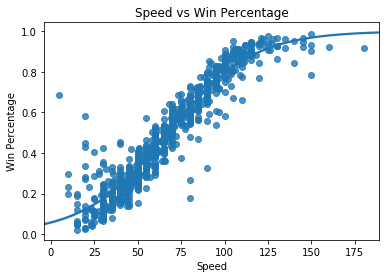

In [40]:
sns.regplot(x="Speed", y="Win Percentage", 
            data=Win_Percent, 
            logistic=True).set_title("Speed vs Win Percentage")

Text(0.5, 1.0, 'Attack Vs Win Percentage')

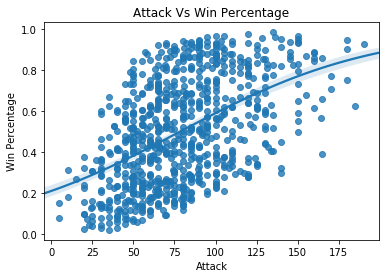

In [41]:
sns.regplot(x="Attack", y="Win Percentage", 
            data=Win_Percent, 
            logistic=True).set_title("Attack Vs Win Percentage")

Text(0.5, 1.0, 'Defense Vs Win Percentage')

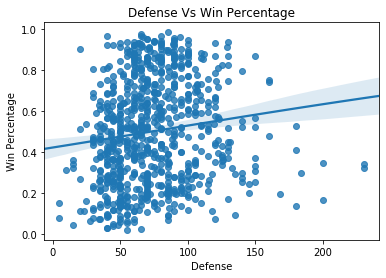

In [42]:
sns.regplot(x="Defense", y="Win Percentage", 
            data=Win_Percent, 
            logistic=True).set_title("Defense Vs Win Percentage")

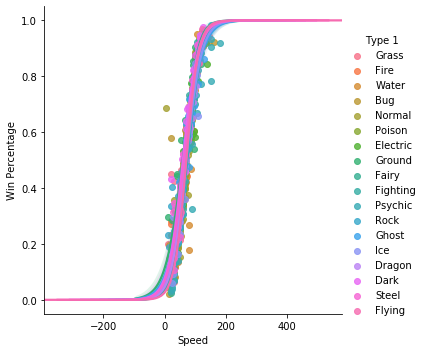

In [43]:
sns.lmplot(x="Speed", y="Win Percentage", 
           data=Win_Percent, 
           hue = 'Type 1',  
           logistic=True)

In [44]:
#Train Data
train_df = Win_Percent.copy()
hp_dict = dict(zip(Win_Percent['Pokemon Number'], Win_Percent['HP']))
atk_dict = dict(zip(Win_Percent['Pokemon Number'], Win_Percent['Attack']))
def_dict = dict(zip(Win_Percent['Pokemon Number'], Win_Percent['Defense']))
sp_atk_dict = dict(zip(Win_Percent['Pokemon Number'],Win_Percent['Sp. Atk']))
sp_def_dict = dict(zip(Win_Percent['Pokemon Number'],Win_Percent['Sp. Def']))
speed_dict = dict(zip(Win_Percent['Pokemon Number'],Win_Percent['Speed']))
total_dict = dict(zip(Win_Percent['Pokemon Number'],Win_Percent['Total Fights']))
win_ratio_dict = dict(zip(Win_Percent['Pokemon Number'],Win_Percent['Win Percentage']))

In [45]:
train_df

Pokemon Number            Name   Type 1  Type 2  HP  Attack  Defense  \
0                 1       Bulbasaur    Grass  Poison  45      49       49   
1                 2         Ivysaur    Grass  Poison  60      62       63   
2                 3        Venusaur    Grass  Poison  80      82       83   
3                 4   Mega Venusaur    Grass  Poison  80     100      123   
4                 5      Charmander     Fire    None  39      52       43   
..              ...             ...      ...     ...  ..     ...      ...   
795             796         Diancie     Rock   Fairy  50     100      150   
796             797    Mega Diancie     Rock   Fairy  50     160      110   
797             798  Hoopa Confined  Psychic   Ghost  80     110       60   
798             799   Hoopa Unbound  Psychic    Dark  80     160       60   
799             800       Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  First_pokemon  \
0         65       65     45           1      False           37.0   
1         80       80     60           1      False           46.0   
2        100      100     80           1      False           89.0   
3        122      120     80           1      False           70.0   
4         60       50     65           1      False           55.0   
..       ...      ...    ...         ...        ...            ...   
795      100      150     50           6       True           39.0   
796      160      110    110           6       True          116.0   
797      150      130     70           6       True           60.0   
798      170      130     80           6       True           89.0   
799      130       90     70           6       True           75.0   

     Second_pokemon  Total Fights  Win Percentage  
0              37.0         133.0        0.278195  
1              46.0         121.0        0.380165  
2              89.0         132.0        0.674242  
3              70.0         125.0        0.560000  
4              55.0         112.0        0.491071  
..              ...           ...             ...  
795            39.0         105.0        0.371429  
796           116.0         131.0        0.885496  
797            60.0         119.0        0.504202  
798            89.0         144.0        0.618056  
799            75.0         121.0        0.619835  

[800 rows x 16 columns]

In [46]:
# create attrs
train_df['first_hp'] = train_df['First_pokemon'].replace(hp_dict)
train_df['first_atk'] = train_df['First_pokemon'].replace(atk_dict)
train_df['first_def'] = train_df['First_pokemon'].replace(def_dict)
train_df['first_sp.atk'] = train_df['First_pokemon'].replace(sp_atk_dict)
train_df['first_sp.def'] = train_df['First_pokemon'].replace(sp_def_dict)
train_df['first_speed'] = train_df['First_pokemon'].replace(speed_dict)
train_df['first_total'] = train_df['First_pokemon'].replace(total_dict)
train_df['first_win_ratio'] = train_df['First_pokemon'].replace(win_ratio_dict)
train_df['second_hp'] = train_df['Second_pokemon'].replace(hp_dict)
train_df['second_atk'] = train_df['Second_pokemon'].replace(atk_dict)
train_df['second_def'] = train_df['Second_pokemon'].replace(def_dict)
train_df['second_sp.atk'] = train_df['Second_pokemon'].replace(sp_atk_dict)
train_df['second_sp.def'] = train_df['Second_pokemon'].replace(sp_def_dict)
train_df['second_speed'] = train_df['Second_pokemon'].replace(speed_dict)
train_df['second_total'] = train_df['Second_pokemon'].replace(total_dict)
train_df['second_win_ratio'] = train_df['Second_pokemon'].replace(win_ratio_dict)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 32 columns):
Pokemon Number      800 non-null int64
Name                799 non-null object
Type 1              800 non-null object
Type 2              800 non-null object
HP                  800 non-null int64
Attack              800 non-null int64
Defense             800 non-null int64
Sp. Atk             800 non-null int64
Sp. Def             800 non-null int64
Speed               800 non-null int64
Generation          800 non-null int64
Legendary           800 non-null bool
First_pokemon       783 non-null float64
Second_pokemon      783 non-null float64
Total Fights        783 non-null float64
Win Percentage      783 non-null float64
first_hp            783 non-null float64
first_atk           783 non-null float64
first_def           783 non-null float64
first_sp.atk        783 non-null float64
first_sp.def        783 non-null float64
first_speed         783 non-null float64
first_total         

In [48]:
train_df.columns

Index(['Pokemon Number', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'First_pokemon', 'Second_pokemon', 'Total Fights', 'Win Percentage',
       'first_hp', 'first_atk', 'first_def', 'first_sp.atk', 'first_sp.def',
       'first_speed', 'first_total', 'first_win_ratio', 'second_hp',
       'second_atk', 'second_def', 'second_sp.atk', 'second_sp.def',
       'second_speed', 'second_total', 'second_win_ratio'],
      dtype='object')

In [49]:
train_df

Pokemon Number            Name   Type 1  Type 2  HP  Attack  Defense  \
0                 1       Bulbasaur    Grass  Poison  45      49       49   
1                 2         Ivysaur    Grass  Poison  60      62       63   
2                 3        Venusaur    Grass  Poison  80      82       83   
3                 4   Mega Venusaur    Grass  Poison  80     100      123   
4                 5      Charmander     Fire    None  39      52       43   
..              ...             ...      ...     ...  ..     ...      ...   
795             796         Diancie     Rock   Fairy  50     100      150   
796             797    Mega Diancie     Rock   Fairy  50     160      110   
797             798  Hoopa Confined  Psychic   Ghost  80     110       60   
798             799   Hoopa Unbound  Psychic    Dark  80     160       60   
799             800       Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  ...  first_total  first_win_ratio  second_hp  \
0         65       65     45  ...        122.0         0.540984       90.0   
1         80       80     60  ...          NaN              NaN      140.0   
2        100      100     80  ...        143.0         0.167832       25.0   
3        122      120     80  ...        130.0         0.669231       40.0   
4         60       50     65  ...        140.0         0.657143       70.0   
..       ...      ...    ...  ...          ...              ...        ...   
795      100      150     50  ...        128.0         0.398438       61.0   
796      160      110    110  ...        140.0         0.621429       50.0   
797      150      130     70  ...        142.0         0.330986       50.0   
798      170      130     80  ...        143.0         0.167832       25.0   
799      130       90     70  ...        116.0         0.439655       90.0   

     second_atk  second_def  second_sp.atk  second_sp.def  second_speed  \
0          92.0        87.0           75.0           85.0          76.0   
1          70.0        45.0           85.0           50.0          45.0   
2          35.0        70.0           95.0           55.0          45.0   
3          35.0        30.0          120.0           70.0         105.0   
4          65.0        60.0           90.0           75.0          90.0   
..          ...         ...            ...            ...           ...   
795        72.0        57.0           55.0           55.0          65.0   
796       105.0        79.0           35.0          110.0          76.0   
797        52.0        48.0           65.0           50.0          55.0   
798        35.0        70.0           95.0           55.0          45.0   
799       130.0        80.0           65.0           85.0          55.0   

     second_total  second_win_ratio  
0           122.0          0.540984  
1             NaN               NaN  
2           143.0          0.167832  
3           130.0          0.669231  
4           140.0          0.657143  
..            ...               ...  
795         128.0          0.398438  
796         140.0          0.621429  
797         142.0          0.330986  
798         143.0          0.167832  
799         116.0          0.439655  

[800 rows x 32 columns]

In [50]:
train_df['is_first_win'] = 'is_first_win'
train_df['is_first_win'] = train_df.apply(lambda x: 1 if x['is_first_win'] == True else 0, axis=1)

In [51]:
y = train_df['is_first_win']
drop_columns = ['is_first_win', 'first_win_ratio', 'second_win_ratio']
x = train_df.drop(drop_columns, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)

In [52]:
acc = {}

In [53]:
print('train_df')

train_df


In [54]:
print('x_train', x_train.shape)

x_train (640, 30)


In [55]:
print('x_test', x_test.shape)

x_test (160, 30)


In [56]:
print('y_train', y_train.shape)

y_train (640,)


In [57]:
print('y_test', y_test.shape)

y_test (160,)


In [58]:
# Model RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

name = 'RandomForestClassifier'
acc[name] = round(random_forest.score(x_test, y_test) * 100, 2)
acc[name]

ValueError: could not convert string to float: 'Hoopa Confined'

In [ ]:
# Model DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

name = 'DecisionTreeClassifier'
acc[name] = round(decision_tree.score(x_test, y_test) * 100, 2)
acc[name]

In [ ]:
effective = pd.DataFrame()
effective['feature_name'] = x.columns.tolist()
effective['feature_importance'] = random_forest.feature_importances_
effective = effective.sort_values(by='feature_importance', ascending=False)
display(effective)